In [4]:
import numpy as np

In [5]:
from IPython.display import Image

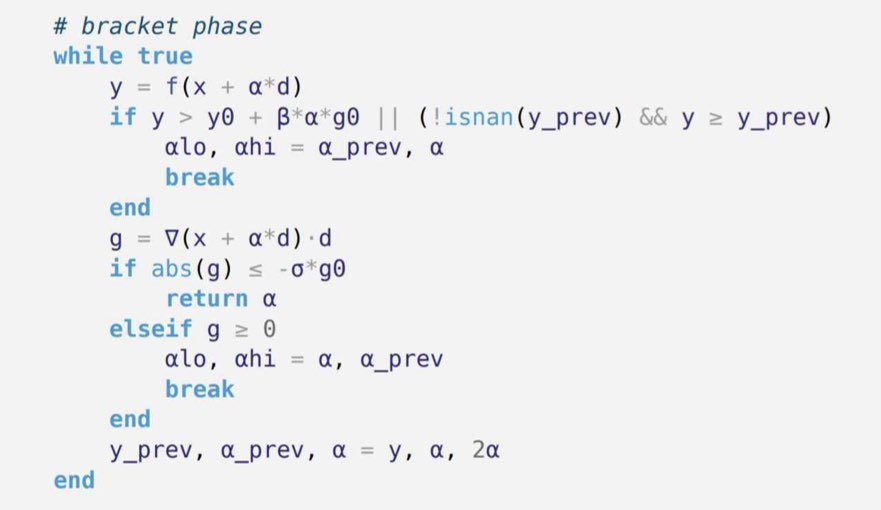

In [6]:
Image('fig6-1.jpg',width=600,height=100)

In [7]:
# Example 4.2: p.58
def f(x):
    y=x[0]**2+x[0]*x[1]+x[1]**2
    return y

In [8]:
# backtracking line search 알고리즘에서는 gradient값을 계산해 인수로 넣어줌
# 여기서는 함수값을 계산할 수 있어야 하기 때문에 x가 주어지면 함수값 리턴되는 형태로 바꾸기

def gradient(x):
    return [2*x[0]+x[1],2*x[1]+x[0]]

In [9]:
x=np.array([1,2])
d=np.array([-1.1,-1.2]) #방향벡터 변경함 -> 계산 편리성

print(f(x))
print(gradient(x))

7
[4, 5]


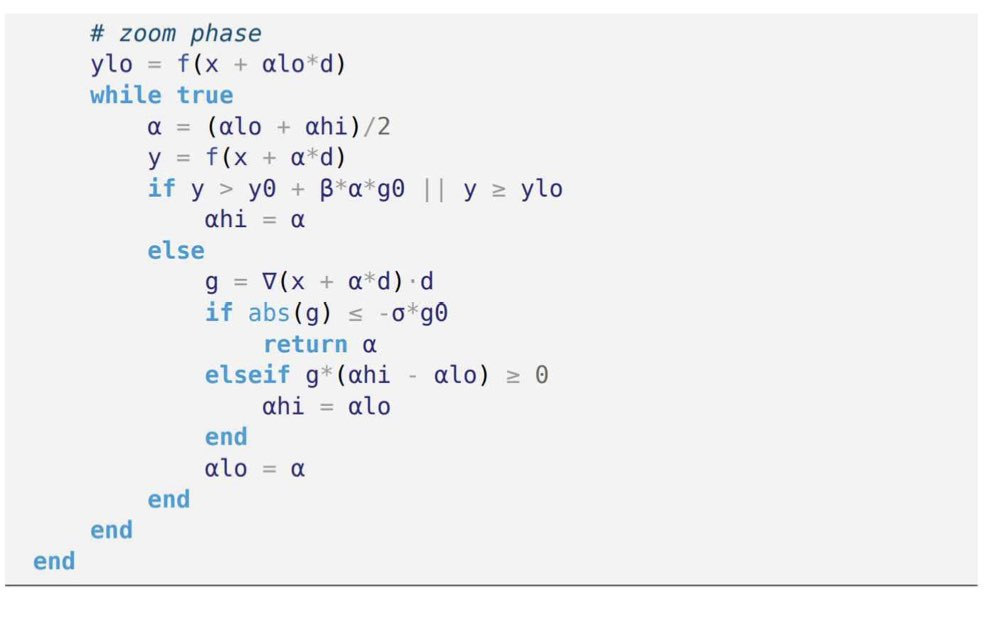

In [10]:
Image('fig6-2.jpg',width=600,height=100)

In [11]:
# Algorithm 4.3 : p.62
def strong_backtracking(f,gradient,x,d,alpha=1, beta=1E-4,sigma=1E-1):
    
    y0,g0,y_prev,alpha_prev=f(x),np.dot(gradient(x),d),np.nan,0.0
    # 곡률조건 : x^(k+1)->y_prev 과 x^(k)번째->y0 반복값 필요
    # g0는 방향도함수
    
    alpha_lo,alpha_hi=np.nan, np.nan #값 저장안되고 메모리 주소만 있음 -> 결측
    
    #bracket phase
    while True:
        y=f(x+alpha*d)
        
        # 아리미오 컨디션 위배 확인
        if (y>y0+beta*alpha*g0) or (not(np.isnan(y_prev)) and y>=y_prev): 
            #y0+beta*alpha*g0: k+1번째에서의 방향 도함수 값
            alpha_lo,alpha_hi=alpha_prev,alpha
            # 이 구간내 알파값 있음
            break
            
        g=np.dot(gradient(x+alpha*d),d) #방향 도함수 값 계산
        
        if np.abs(g) <= -sigma*g0: #절댓값 붙어있는 strong condition
            return alpha
        elif g>=0: #구간 옮길 수 있음
            alpha_lo,alpha_hi , alpha,alpha_prev
            break
            
        y_prev,alpha_prev,alpha=y,alpha,2*alpha
            
    print('bracket: %.4f, %.4f' %(alpha_lo,alpha_hi))
    
    
    # zoom phase
    y_lo=f(x+alpha_lo*d)
    
    while True: #bysection -> step harving
        alpha=0.5*(alpha_lo+alpha_hi)
        y=f(x+alpha*d)#이동
        
        #조건 확인
        if (y>y0+beta*alpha*g0) or (y>=y_lo): #아르미오 조건
            # 이미 계산되었기 때문에 y_prev가 nan인지 아닌지 구분하는 조건 필요 없음
            alpha_hi =alpha
        else:
            g=np.dot(gradient(x+alpha*d),d) #두번째 wolfe 조건 확인
            # 방향도함수 결정
            if abs(g)<=-sigma*g0:
                return alpha
            elif g*(alpha_hi-alpha_lo)>=0: #구간만큼 이동값 0 이상
                #세번째 조건 만족되는지 확인
                alpha_hi=alpha_lo
            alpha_lo=alpha

In [12]:
alpha=strong_backtracking(f,gradient,x,d)
print(alpha)
# 1번째 bracket phase에서 alpha가 포함이 되어 있다고 생각되는 구간 (1,2) 정해짐
# 2번째 zoom phase에서 줄여나갔더니 2번 step- harving일어남 -> 1.25

# alpha에 의해 x=[1,2]로 주어진 값이 그 다음 반복을 위해 결정됨

print(x+alpha*d) # x 계획점은 이 구간으로 이동

print(f(x+alpha*d)) #그 계획점에서의 목적함수 값
# 그냥 반복에서의 첫번째, alpha=1에서의 목적함수 값보다 많이 줄어들었음\

# 매 계산과정, k번째 반복마다 wolfe condition(충분감소 조건, 곡률조건)이용해서 
# strong_backtracking 알고리즘 반복해 주어진 목적함수의 최소값 찾아나감

# 일반적인 local desecnt 알고리즘 이용해 반복계산 수행
# strong_backtracking 알고리즘은 컨쥬게이트 그레디언트 디센트 메소드 또는 뉴튼 왓슨 메소드 등등에서 많이 이용됨
# 작성한 코드가 어떻게 구성이 되는지 
# 한 줄씩 뜯어보세요
# 알고리즘과 비교! 수식과 비교! 
# 많이 여러번 읽어보세요!!



#### 코딩하기 쉽지 않음 -> 나는 이해하기가 더 어려워,,,,
#### 알고리즘 복습하세요!

# 앞으로는 알고리즘도 복잡, 코딩도 복잡
# 집중력 가지고 열심히 follow - up 하세요!


bracket: 1.0000, 2.0000
1.25
[-0.375  0.5  ]
0.203125


In [13]:
print(alpha)

1.25
